# Unit 5 - Financial Planning

In [92]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [93]:
# Load .env enviroment variables
load_dotenv()


True

## Part 1 - Personal Finance Planner
### Collect Crypto Prices Using the `requests` Library

In [94]:
# Set current amount of crypto assets
average_income = 12000
my_btc = 1.2
my_eth = 5.3


In [95]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [96]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
btc_price = btc_data['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_price

eth_price = eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $55342.80
The current value of your 5.3 ETH is $18238.10


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [97]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [98]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [99]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
my_stocks_bonds = api.get_barset(
    tickers,
    timeframe,
    start=today
).df

# Preview DataFrame
my_stocks_bonds.head()


AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-09-10 00:00:00-04:00  115.99  116.01  115.7801  115.87  2767552  451.04   

                                                            
                             high     low  close    volume  
time                                                        
2021-09-10 00:00:00-04:00  451.49  445.31  445.5  75763259

In [100]:
# Pick AGG and SPY close prices
agg_close_price = float(my_stocks_bonds['AGG']['close'])
spy_close_price = float(my_stocks_bonds['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $115.87
Current SPY closing price: $445.5


In [101]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22275.00
The current value of your 200 AGG shares is $23174.00


### Savings Health Analysis

In [102]:
# Set monthly household income
my_monthly_income = 12000

# Consolidate financial assets data
my_crypto_assets = my_btc_value + my_eth_value
my_shares_assets = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [my_crypto_assets, my_shares_assets]}, index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,73580.895
shares,45449.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

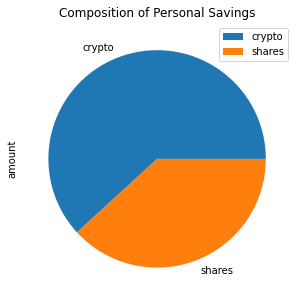

In [103]:
# Plot savings pie chart
df_savings.plot.pie(title='Composition of Personal Savings', y='amount', figsize=(5,5))


In [104]:
# Set ideal emergency fund
my_emergency_fund = my_monthly_income * 3

# Calculate total amount of savings
my_total_savings = my_crypto_assets + my_shares_assets

# Validate saving health
if my_total_savings > my_emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif my_total_savings == my_emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${my_emergency_fund - my_total_savings} away from reaching your financial goal.")
    

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [115]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-09-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-11', tz='America/New_York').isoformat()


In [116]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-09-20 00:00:00-04:00  109.84  109.9194  109.59  109.700  1216139.0   
2017-09-21 00:00:00-04:00  109.82  109.8500  109.68  109.680  2102279.0   
2017-09-22 00:00:00-04:00  109.86  109.9000  109.75  109.785  1325024.0   
2017-09-25 00:00:00-04:00  109.85  110.0400  109.82  110.025  3031529.0   
2017-09-26 00:00:00-04:00  109.95  110.0200  109.88  109.990  2074080.0   

                              SPY                                         
                             open      high      low   close      volume  
time                                                                      
2017-09-20 00:00:00-04:00     NaN       NaN      NaN     NaN         NaN  
2017-09-21 00:00:00-04:00  249.89  249.9800  249.185  249.40  29220256.0  
2017-09-22 00:00:00-04:00  249.05  249.6300  249.020  249.42  31078666.0  
2017-09-25 00:00:00-04:00  249.14  249.5532  248.080  248.94  42826453.0  
2017-09-26 00:00:00-04:00  249.42  249.7000  248.805  249.05  36761208.0

In [117]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 30 years daily returns
MC_AGG_SPY = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [118]:
# Printing the simulation input data
MC_AGG_SPY.portfolio_data.head()


AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-09-20 00:00:00-04:00  109.84  109.9194  109.59  109.700  1216139.0   
2017-09-21 00:00:00-04:00  109.82  109.8500  109.68  109.680  2102279.0   
2017-09-22 00:00:00-04:00  109.86  109.9000  109.75  109.785  1325024.0   
2017-09-25 00:00:00-04:00  109.85  110.0400  109.82  110.025  3031529.0   
2017-09-26 00:00:00-04:00  109.95  110.0200  109.88  109.990  2074080.0   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2017-09-20 00:00:00-04:00          NaN     NaN       NaN      NaN     NaN   
2017-09-21 00:00:00-04:00    -0.000182  249.89  249.9800  249.185  249.40   
2017-09-22 00:00:00-04:00     0.000957  249.05  249.6300  249.020  249.42   
2017-09-25 00:00:00-04:00     0.002186  249.14  249.5532  248.080  248.94   
2017-09-26 00:00:00-04:00    -0.000318  249.42  249.7000  248.805  249.05   

                                                    
                               volume daily_return  
time                                                
2017-09-20 00:00:00-04:00         NaN          NaN  
2017-09-21 00:00:00-04:00  29220256.0          NaN  
2017-09-22 00:00:00-04:00  31078666.0     0.000080  
2017-09-25 00:00:00-04:00  42826453.0    -0.001924  
2017-09-26 00:00:00-04:00  36761208.0     0.000442

In [119]:
MC_AGG_SPY.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996694,1.009846,0.996583,0.994961,1.012455,0.985737,0.995545,0.997901,1.001530,1.007368,...,0.997317,0.994343,0.982614,1.015714,1.001748,1.000633,1.008810,0.998093,0.984538,1.017096
2,0.989601,1.006145,0.994361,1.007918,1.017204,0.971603,0.994799,0.985614,1.000697,1.021605,...,0.994564,0.995062,0.980497,1.026422,1.003098,1.004629,1.014918,0.997976,0.986202,1.015852
3,0.985427,1.020219,0.998498,1.001123,1.009191,0.961419,0.995982,0.985630,1.006653,1.013521,...,0.998841,1.002446,0.976694,1.030878,1.003614,1.008529,1.023988,1.002317,0.986720,1.009927
4,0.984623,1.023607,1.000132,1.006043,1.027223,0.950362,1.016953,0.983492,1.012507,1.015928,...,1.016337,0.999629,0.978275,1.037173,1.009686,1.015897,1.027278,1.014181,0.986807,1.009765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,31.057364,17.090957,11.683057,13.410269,10.492494,14.278379,7.774220,37.330602,20.701136,62.323485,...,11.925759,11.713219,20.149987,10.788686,50.442583,12.631690,41.040534,22.968256,22.402379,30.925880
7557,30.962627,17.147641,11.784016,13.377058,10.551479,14.322088,7.761513,37.983434,20.808539,63.299571,...,12.093807,11.615268,20.334375,10.813336,50.614045,12.632216,40.850567,23.095625,22.569699,30.712124
7558,31.193272,17.171031,11.814542,13.423372,10.351547,14.335462,7.788134,38.255282,20.945296,63.454972,...,11.950575,11.755163,20.342846,10.841678,50.810144,12.609162,40.600518,23.147660,22.494667,30.663115
7559,30.987149,17.177266,11.888752,13.370394,10.350060,14.464968,7.950887,37.989101,20.962415,63.491119,...,11.945991,11.688031,20.325500,10.819427,50.229460,12.518228,40.646933,22.871090,22.352191,30.328998


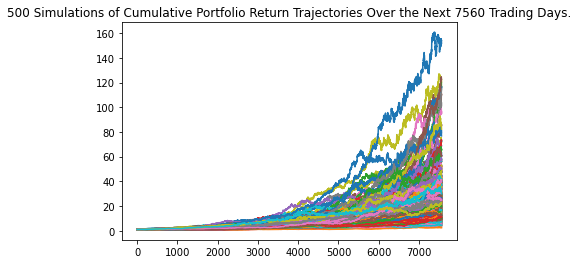

In [120]:
# Plot simulation outcomes
line_plot = MC_AGG_SPY.plot_simulation()


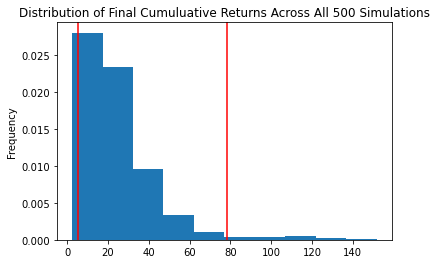

In [121]:
# Plot probability distribution and confidence intervals
dist_plot = MC_AGG_SPY.plot_distribution()


### Retirement Analysis

In [122]:
# Fetch summary statistics from the Monte Carlo simulation results
my_portfolio_stats = MC_AGG_SPY.summarize_cumulative_return()

# Print summary statistics
print(my_portfolio_stats)


count           500.000000
mean             24.984372
std              19.457543
min               2.375528
25%              12.358515
50%              20.694035
75%              30.580119
max             151.682333
95% CI Lower      5.255710
95% CI Upper     78.146651
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.


In [123]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(my_portfolio_stats[8]*initial_investment,2)
ci_upper = round(my_portfolio_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $105114.21 and $1562933.02


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [124]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(my_portfolio_stats[8]*initial_investment,2)
ci_upper = round(my_portfolio_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $157671.31 and $2344399.52
